# Job Barcelona 2023



## Descripción del DataSet

- CLIENTNUM: Identificador único para cada cliente. (Integer)

- Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)

- * Attrited Customer -> 0
- * Existing Customer -> 1
- Customer_Age: Edad del cliente. (Integer)

- Gender: Sexo del cliente. (String)

- Dependent_count: Número de personas a cargo que tiene el cliente. (Integer)

- Education_Level: Nivel educativo del cliente. (String)

- Marital_Status: Marital status of customer. (String)

- Income_Category: Categoría de ingresos del cliente. (String)

- Card_Category: Tipo de tarjeta del cliente. (String)

- Months_on_book: El tiempo que el cliente ha estado en los libros. (Integer)

- Total_Relationship_Count: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito. (Integer)

- Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses.(Integer)

- Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

- Credit_Limit: Límite de crédito del cliente. (Integer)

- Total_Revolving_Bal: Saldo renovable total del cliente. (Integer)

- Avg_Open_To_Buy: Ratio medio de apertura a la compra del cliente. (Integer)

- Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

- Total_Trans_Amt: Importe total de la transacción. (Integer)

- Total_Trans_Ct: Recuento total de transacciones. (Integer)

- Total_Ct_Chng_Q4_Q1: Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

- Avg_Utilization_Ratio: Ratio de utilización media del cliente. (Integer)

- Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

- Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

- Credit_Limit: Límite de crédito del cliente. (Integer)

- Total_Revolving_Bal: Saldo rotativo total del cliente. (Integer)

- Avg_Open_To_Buy: Ratio medio de apertura a compra del cliente. (Integer)

- Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

- Total_Trans_Amt: Importe total de la transacción. (Integer)

- Total_Trans_Ct: Recuento total de transacciones.. (Integer)

- Total_Ct_Chng_Q4_Q1: Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

- Avg_Utilization_Ratio: Ratio de utilización media del cliente. (Integer)

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt 
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale, LabelBinarizer
from imblearn.pipeline import Pipeline
import imblearn.combine as hib
import imblearn.under_sampling as us
import imblearn.over_sampling as os
from sklearn.metrics import plot_confusion_matrix, f1_score
import lightgbm as ltb
from lazypredict.Supervised import LazyClassifier

# Varios
# ==============================================================================
from datetime import date
import json
import re


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [2]:
train = pd.read_csv("supply_chain_train.csv", index_col = "train_idx")
train

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.00,1728,1995.00,0.59,8554,99,0.68,0.46,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.00,1803,3593.00,0.49,2107,39,0.39,0.33,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.00,1648,14339.00,0.73,1436,36,1.25,0.10,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.00,2517,1108.00,1.16,2616,46,1.30,0.69,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.00,1926,794.00,0.60,3806,61,0.79,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,769053033,44,F,1,Graduate,Single,$40K - $60K,Blue,38,3,...,5,4142.00,2517,1625.00,0.81,2104,44,0.83,0.61,0
8097,714406158,53,F,3,High School,Divorced,Unknown,Blue,36,4,...,6,7939.00,0,7939.00,0.55,2269,42,0.31,0.00,0
8098,714140133,42,F,4,Graduate,Unknown,Less than $40K,Blue,32,3,...,2,2314.00,1547,767.00,0.80,4678,74,1.00,0.67,1


In [3]:
test = pd.read_csv("supply_chain_test.csv", index_col = "test_idx")
test

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,,
0,719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.00,1508,1483.00,0.70,3734,64,0.88,0.50
1,773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.00,1569,623.00,0.71,4010,79,0.72,0.72
2,715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.00,987,747.00,0.88,4727,67,0.91,0.57
3,711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.00,1516,3270.00,0.94,4973,74,0.85,0.32
4,718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.00,2170,1544.00,0.52,1454,35,0.52,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,814776033,34,M,2,Graduate,Single,$80K - $120K,Blue,29,3,1,3,13395.00,1678,11717.00,1.01,2650,69,0.86,0.12
2022,720444408,35,F,1,College,Single,Less than $40K,Blue,25,2,2,4,2231.00,1791,440.00,0.82,2576,42,0.75,0.80
2023,720503508,44,F,1,Uneducated,Divorced,Less than $40K,Blue,37,1,2,3,5594.00,1235,4359.00,0.55,5220,75,0.83,0.22


## Transformación de categórico a numérico

In [4]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.00,1728,1995.00,0.59,8554,99,0.68,0.46,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.00,1803,3593.00,0.49,2107,39,0.39,0.33,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.00,1648,14339.00,0.73,1436,36,1.25,0.10,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.00,2517,1108.00,1.16,2616,46,1.30,0.69,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.00,1926,794.00,0.60,3806,61,0.79,0.71,1


Para crear el modelo de clasificación vamos a prescindir de la variable CLIENTNUM, ya que es simplemente un identificador de cada cliente y no aporta nada al modelo, solo sirve para identificarlo en la base de datos.

In [5]:
if "CLIENTNUM" in train.columns:
	train.drop('CLIENTNUM', axis = 1, inplace = True)
 
if "CLIENTNUM" in test.columns:
	test.drop('CLIENTNUM', axis = 1, inplace = True)

In [6]:
train.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Attrition_Flag                int64
dtype: object

Como podemos ver tenemos varias variables de tipo object, las cuales las tenemos que pasar a números. Para ello utilizaremos la técnica **One Hot Encoding**, que creará una variable binaria por cada valor distinto tome la variable categórica.

In [7]:
train_num = train.select_dtypes(exclude = 'object') #Variables numericas
train_cat = train.select_dtypes(include = 'object') #Variables categoricas

In [8]:
test_num = test.select_dtypes(exclude = 'object') #Variables numericas
test_cat = test.select_dtypes(include = 'object') #Variables categoricas

In [9]:
print("Numero de variables numéricas: ", train_num.shape[1])
print("Numero de variables categóricas: ", train_cat.shape[1])

Numero de variables numéricas:  15
Numero de variables categóricas:  5


In [10]:
train_cat

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
train_idx,,,,,
0,F,Unknown,Single,Unknown,Blue
1,F,High School,Married,Unknown,Blue
2,F,Unknown,Single,Less than $40K,Gold
3,F,Graduate,Single,Less than $40K,Blue
4,F,High School,Married,$40K - $60K,Blue
...,...,...,...,...,...
8096,F,Graduate,Single,$40K - $60K,Blue
8097,F,High School,Divorced,Unknown,Blue
8098,F,Graduate,Unknown,Less than $40K,Blue


In [11]:
data_cat_transform = [] #Lista en la que guardaremos las nuevas variables creadas con el metodo ONE HOT en base a las categoricas dadas

for label in train_cat.columns:#procedemos a transformar las variables categoricas con ONE HOT

        lb = LabelBinarizer()        
        lb_results = lb.fit(train_cat[label].astype("str"))
        lb_results = lb.transform(train_cat[label].astype("str"))

        if lb_results.shape[1] > 2:
            nombres_nuevas_variables = list(map(lambda x: label + ": " + x, lb.classes_))#tenemos mas de dos etiquetas en la variable categorica
        else:##binarias
            clase = train_cat.loc[:,label][0]
            nombres_nuevas_variables = [label + str(clase)]#tenemos solo dos etiquetas en la variable categorica


        lb_results_train = pd.DataFrame(lb_results, columns = nombres_nuevas_variables)   

        data_cat_transform.append(lb_results_train)

data_cat = pd.concat(data_cat_transform, axis = 1)#Concatenamos todas las variables creadas las cuales hacen referencia a todas las categoricas

datos = pd.concat([data_cat.reset_index(drop = True), train_num.reset_index(drop = True)],axis = 1).set_index(train.index) #Concatenamos con el resto de variables numericas y obtenemos nuestro conjunto de datos transformado
print('Dimensión del dataset incial: {}\nDimensión del dataset transformado: {}'.format(train.shape, datos.shape))#Imprimimos las dimensiones del nuevo dataset y el antiguo
datos

Dimensión del dataset incial: (8101, 20)
Dimensión del dataset transformado: (8101, 37)


,GenderF,Education_Level: College,Education_Level: Doctorate,Education_Level: Graduate,Education_Level: High School,Education_Level: Post-Graduate,Education_Level: Uneducated,Education_Level: Unknown,Marital_Status: Divorced,Marital_Status: Married,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,...,3,3723.00,1728,1995.00,0.59,8554,99,0.68,0.46,1
1,0,0,0,0,1,0,0,0,0,1,...,3,5396.00,1803,3593.00,0.49,2107,39,0.39,0.33,0
2,0,0,0,0,0,0,0,1,0,0,...,3,15987.00,1648,14339.00,0.73,1436,36,1.25,0.10,1
3,0,0,0,1,0,0,0,0,0,0,...,4,3625.00,2517,1108.00,1.16,2616,46,1.30,0.69,1
4,0,0,0,0,1,0,0,0,0,1,...,4,2720.00,1926,794.00,0.60,3806,61,0.79,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0,0,0,1,0,0,0,0,0,0,...,5,4142.00,2517,1625.00,0.81,2104,44,0.83,0.61,0
8097,0,0,0,0,1,0,0,0,1,0,...,6,7939.00,0,7939.00,0.55,2269,42,0.31,0.00,0
8098,0,0,0,1,0,0,0,0,0,0,...,2,2314.00,1547,767.00,0.80,4678,74,1.00,0.67,1


Dejamos preparados los datos de test para su posterior predicción

In [12]:
data_cat_transform = [] #Lista en la que guardaremos las nuevas variables creadas con el metodo ONE HOT en base a las categoricas dadas

for label in test_cat.columns:#procedemos a transformar las variables categoricas con ONE HOT

        lb = LabelBinarizer()        
        lb_results = lb.fit(test_cat[label].astype("str"))
        lb_results = lb.transform(test_cat[label].astype("str"))

        if lb_results.shape[1] > 2:
            nombres_nuevas_variables = list(map(lambda x: label + ": " + x, lb.classes_))#tenemos mas de dos etiquetas en la variable categorica
        else:##binarias
            clase = test_cat.loc[:,label][0]
            nombres_nuevas_variables = [label + str(clase)]#tenemos solo dos etiquetas en la variable categorica


        lb_results_train = pd.DataFrame(lb_results, columns = nombres_nuevas_variables)   

        data_cat_transform.append(lb_results_train)

data_cat = pd.concat(data_cat_transform, axis = 1)#Concatenamos todas las variables creadas las cuales hacen referencia a todas las categoricas

datos_test = pd.concat([data_cat.reset_index(drop = True), test_num.reset_index(drop = True)],axis = 1).set_index(test.index) #Concatenamos con el resto de variables numericas y obtenemos nuestro conjunto de datos transformado
print('Dimensión del dataset incial: {}\nDimensión del dataset transformado: {}'.format(test.shape, datos_test.shape))#Imprimimos las dimensiones del nuevo dataset y el antiguo
datos_test

Dimensión del dataset incial: (2026, 19)
Dimensión del dataset transformado: (2026, 36)


,GenderF,Education_Level: College,Education_Level: Doctorate,Education_Level: Graduate,Education_Level: High School,Education_Level: Post-Graduate,Education_Level: Uneducated,Education_Level: Unknown,Marital_Status: Divorced,Marital_Status: Married,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,...,3,4,2991.00,1508,1483.00,0.70,3734,64,0.88,0.50
1,1,0,0,0,0,0,1,0,0,0,...,5,4,2192.00,1569,623.00,0.71,4010,79,0.72,0.72
2,0,0,0,1,0,0,0,0,1,0,...,3,3,1734.00,987,747.00,0.88,4727,67,0.91,0.57
3,1,0,1,0,0,0,0,0,1,0,...,2,3,4786.00,1516,3270.00,0.94,4973,74,0.85,0.32
4,1,0,0,0,0,0,0,1,0,0,...,3,2,3714.00,2170,1544.00,0.52,1454,35,0.52,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,1,0,0,1,0,0,0,0,0,0,...,1,3,13395.00,1678,11717.00,1.01,2650,69,0.86,0.12
2022,0,1,0,0,0,0,0,0,0,0,...,2,4,2231.00,1791,440.00,0.82,2576,42,0.75,0.80
2023,0,0,0,0,0,0,1,0,1,0,...,2,3,5594.00,1235,4359.00,0.55,5220,75,0.83,0.22


In [13]:
data_num = datos.select_dtypes(exclude = 'object') #Variables numericas
data_cat = datos.select_dtypes(include = 'object') #Variables categoricas

print("Numero de variables numéricas: ", data_num.shape[1])
print("Numero de variables categóricas: ", data_cat.shape[1])

Numero de variables numéricas:  37
Numero de variables categóricas:  0


## Análisis exploratorio

Primero vamos a analizar las variables numéricas. Son la Customer_Age, Months_on_book, Dependent_count, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 y Avg_Utilization_Ratio.

#### Customer_Age

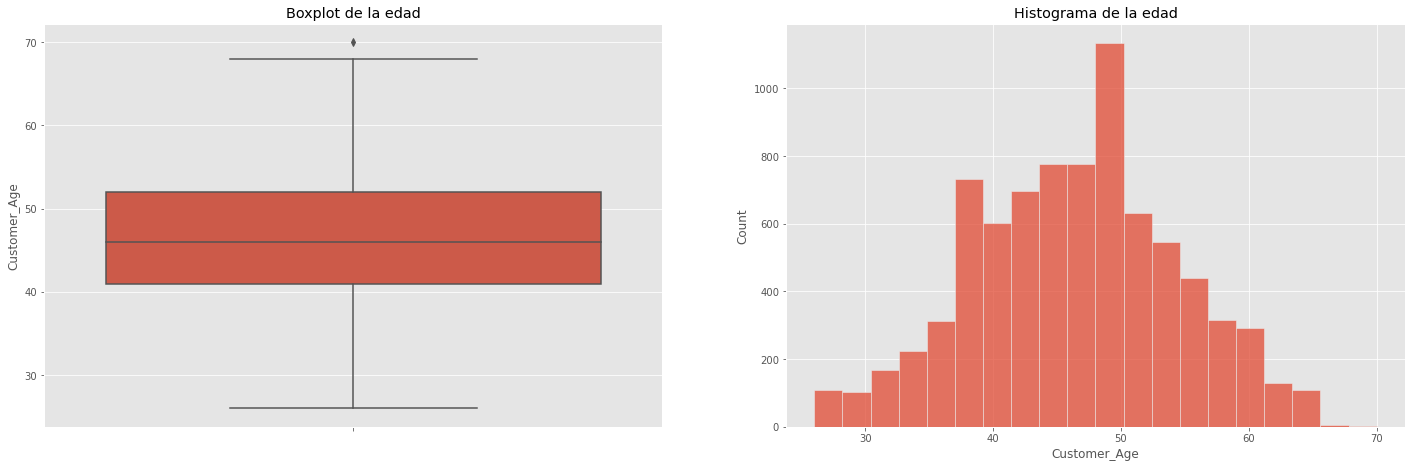

In [14]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Customer_Age"], ax = axes[0])
sns.histplot(data = datos.Customer_Age, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de la edad")
axes[1].set_title("Histograma de la edad")
plt.show()

#### Months_on_book

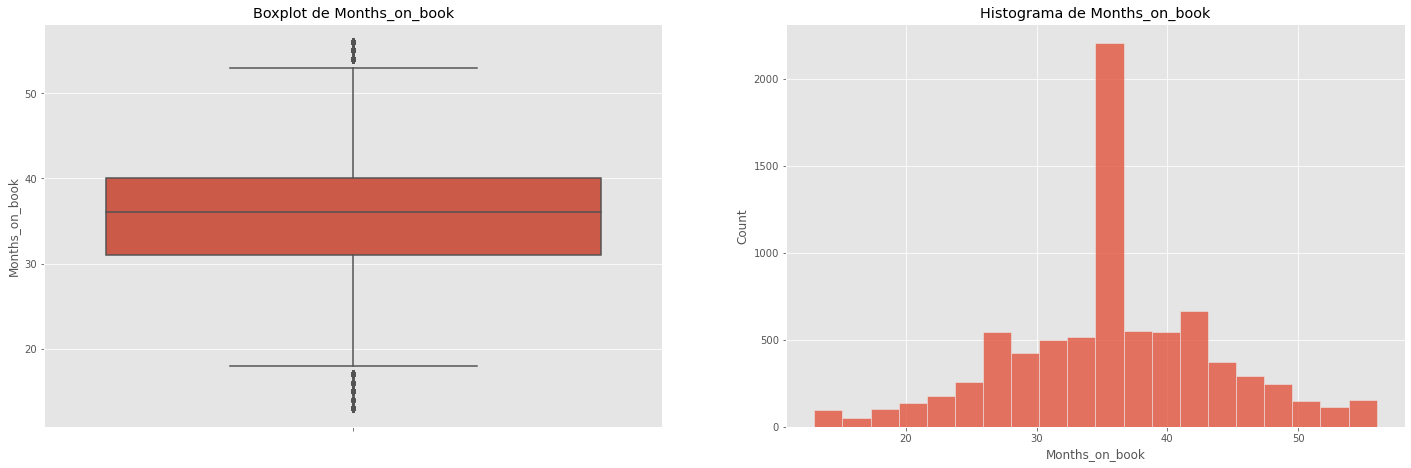

In [15]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Months_on_book"], ax = axes[0])
sns.histplot(data = datos.Months_on_book, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Months_on_book")
axes[1].set_title("Histograma de Months_on_book")
plt.show()

#### Dependent_count

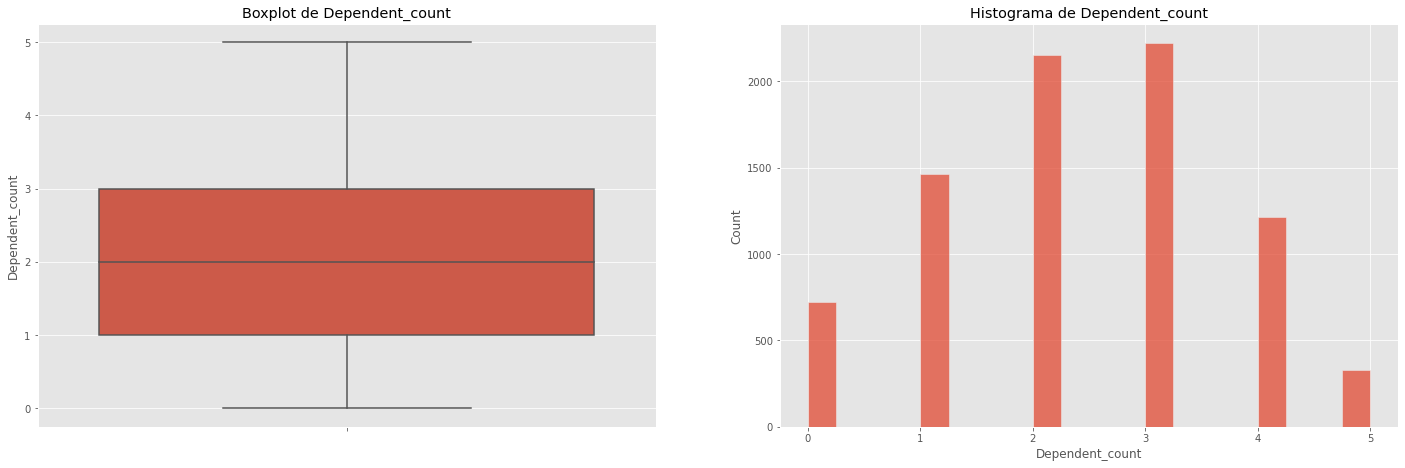

In [16]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Dependent_count"], ax = axes[0])
sns.histplot(data = datos.Dependent_count, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Dependent_count")
axes[1].set_title("Histograma de Dependent_count")
plt.show()

#### Total_Relationship_Count

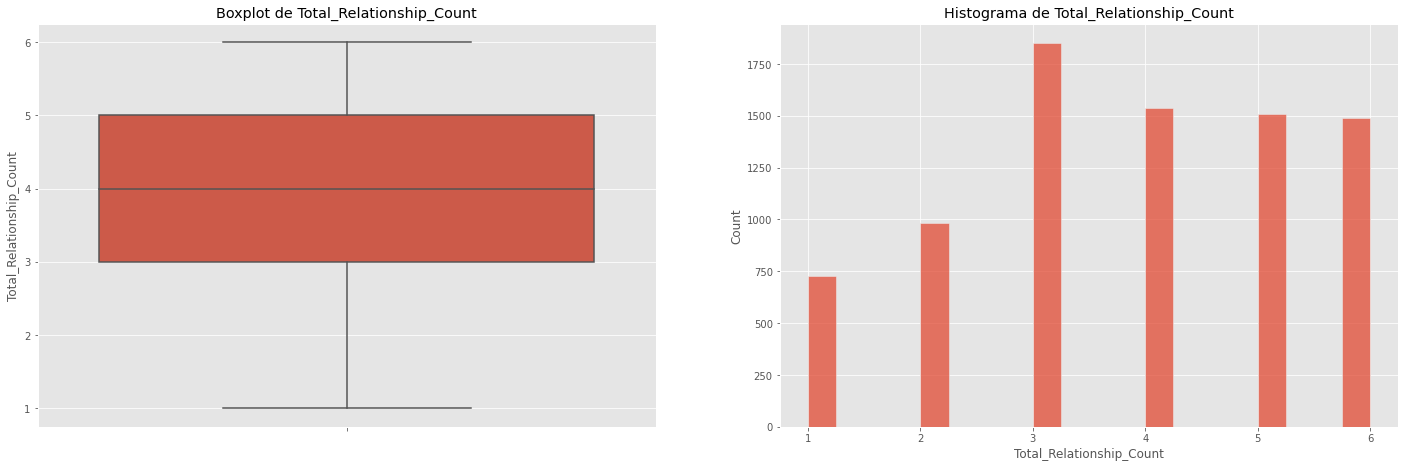

In [17]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Relationship_Count"], ax = axes[0])
sns.histplot(data = datos.Total_Relationship_Count, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Relationship_Count")
axes[1].set_title("Histograma de Total_Relationship_Count")
plt.show()

#### Months_Inactive_12_mon

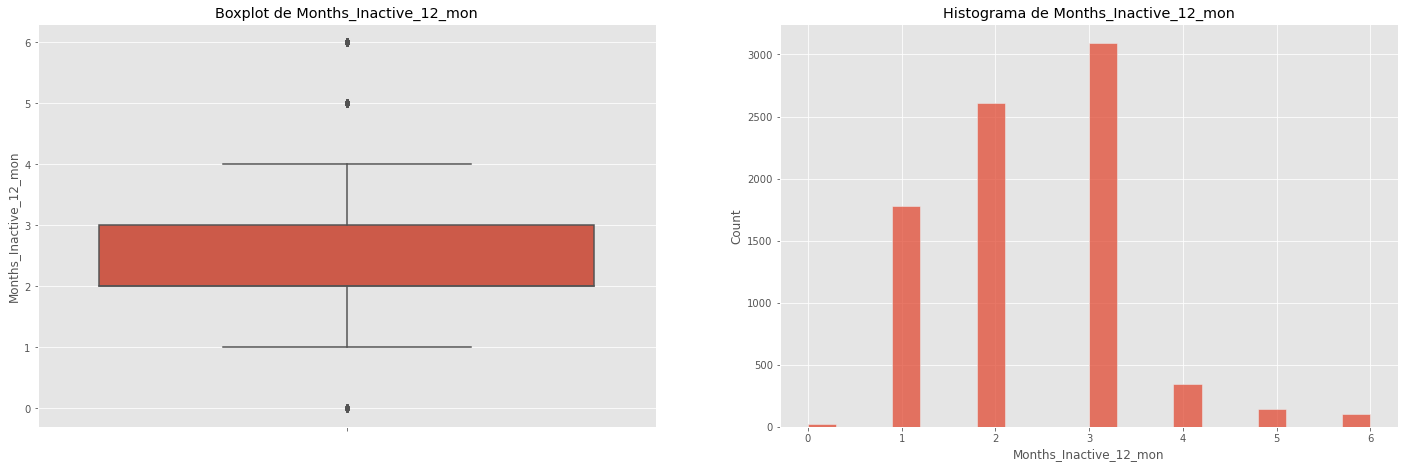

In [18]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Months_Inactive_12_mon"], ax = axes[0])
sns.histplot(data = datos.Months_Inactive_12_mon, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Months_Inactive_12_mon")
axes[1].set_title("Histograma de Months_Inactive_12_mon")
plt.show()

#### Contacts_Count_12_mon

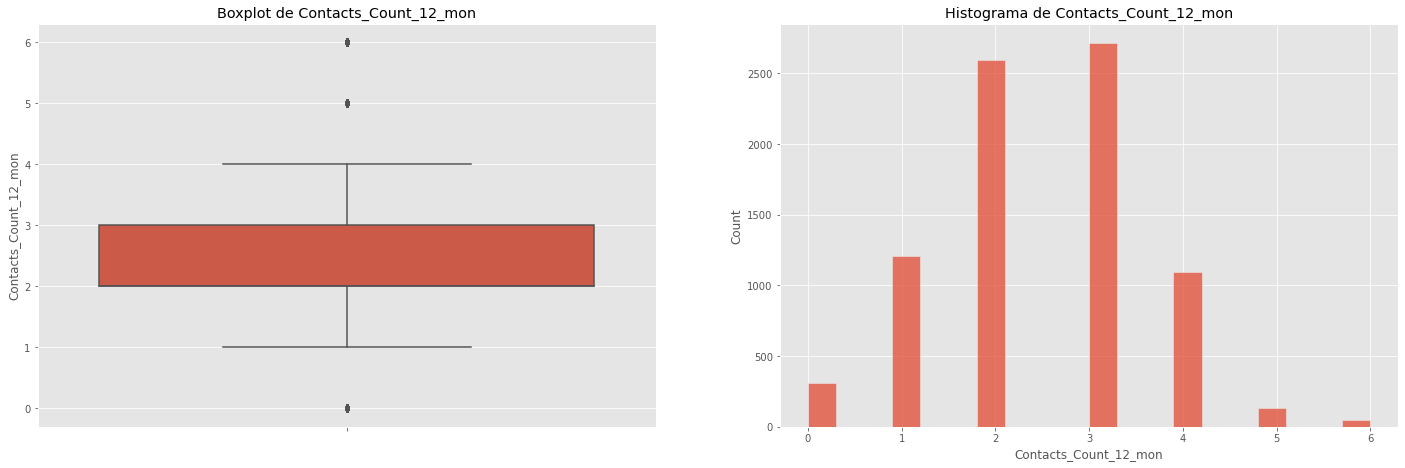

In [19]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Contacts_Count_12_mon"], ax = axes[0])
sns.histplot(data = datos.Contacts_Count_12_mon, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Contacts_Count_12_mon")
axes[1].set_title("Histograma de Contacts_Count_12_mon")
plt.show()

#### Credit_Limit

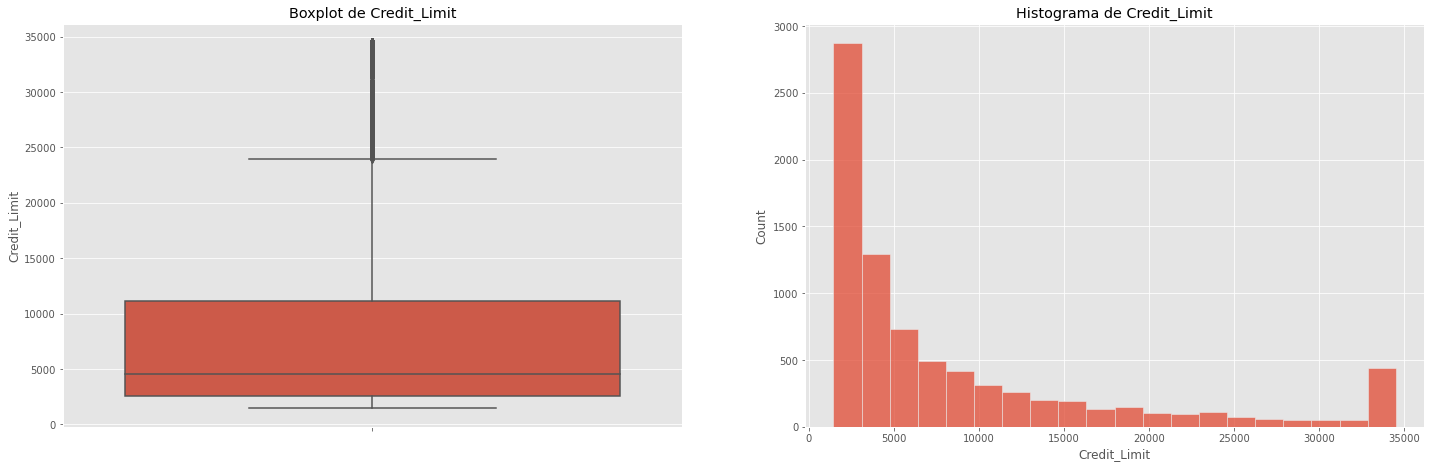

In [20]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Credit_Limit"], ax = axes[0])
sns.histplot(data = datos.Credit_Limit, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Credit_Limit")
axes[1].set_title("Histograma de Credit_Limit")
plt.show()

#### Total_Revolving_Bal

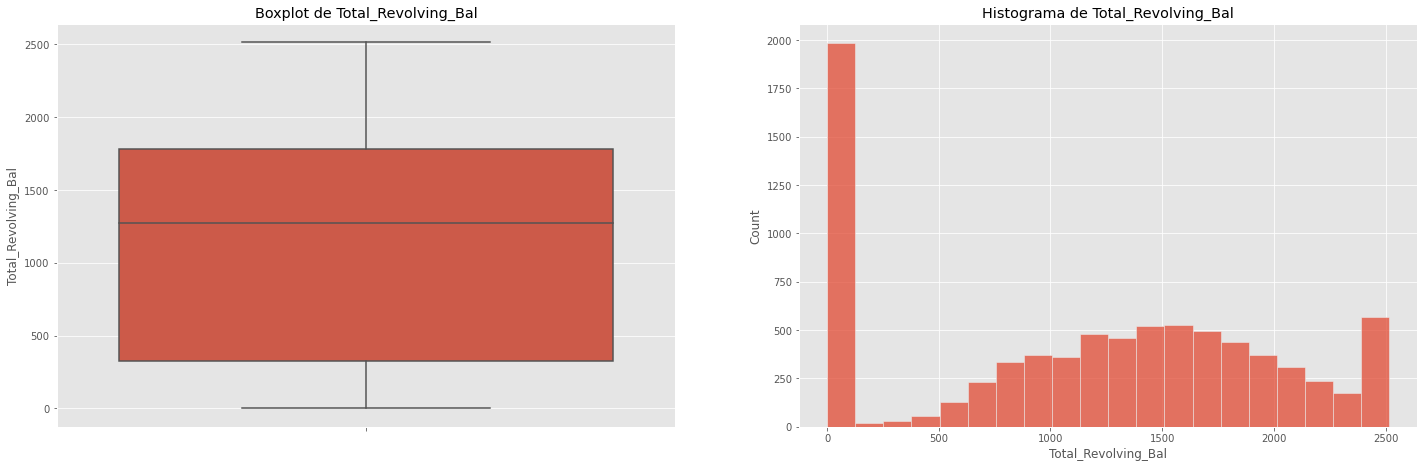

In [21]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Revolving_Bal"], ax = axes[0])
sns.histplot(data = datos.Total_Revolving_Bal, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Revolving_Bal")
axes[1].set_title("Histograma de Total_Revolving_Bal")
plt.show()

#### Avg_Open_To_Buy

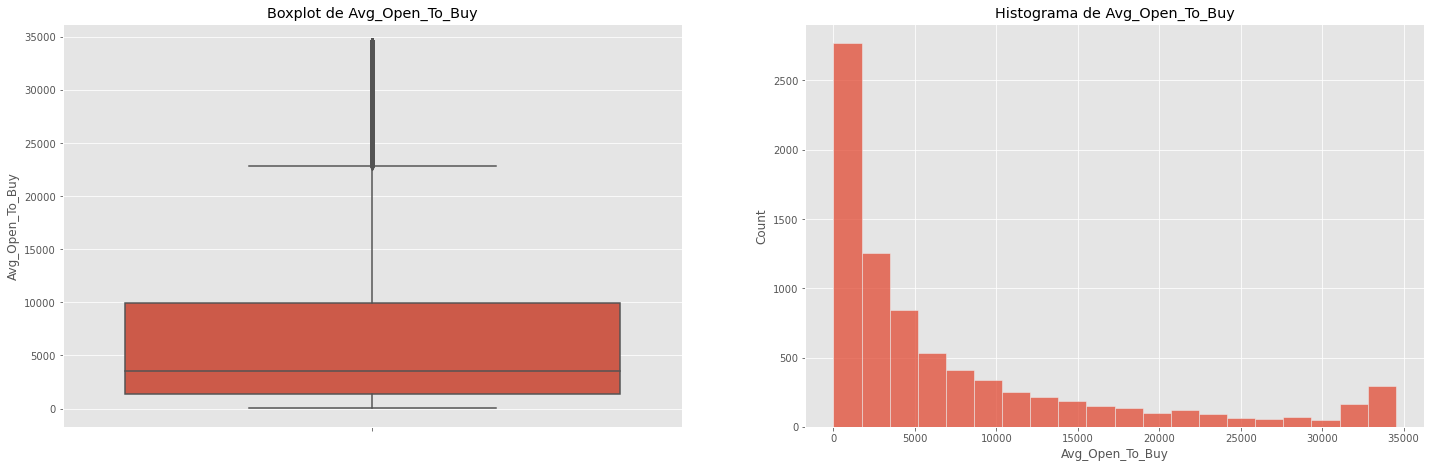

In [22]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Avg_Open_To_Buy"], ax = axes[0])
sns.histplot(data = datos.Avg_Open_To_Buy, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Avg_Open_To_Buy")
axes[1].set_title("Histograma de Avg_Open_To_Buy")
plt.show()

#### Total_Amt_Chng_Q4_Q1

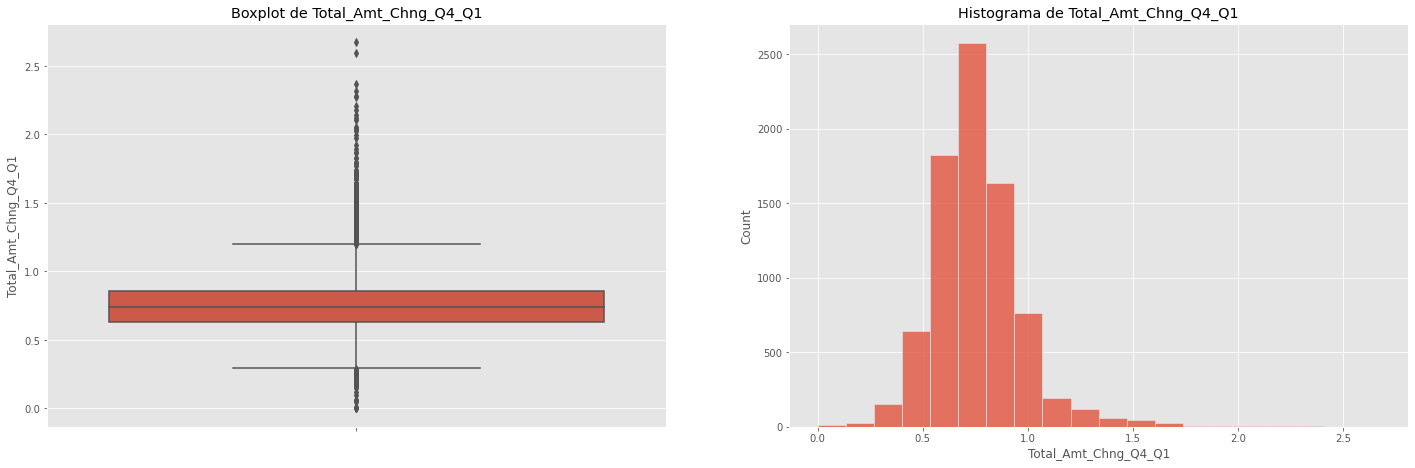

In [23]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Amt_Chng_Q4_Q1"], ax = axes[0])
sns.histplot(data = datos.Total_Amt_Chng_Q4_Q1, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Amt_Chng_Q4_Q1")
axes[1].set_title("Histograma de Total_Amt_Chng_Q4_Q1")
plt.show()

#### Total_Trans_Amt

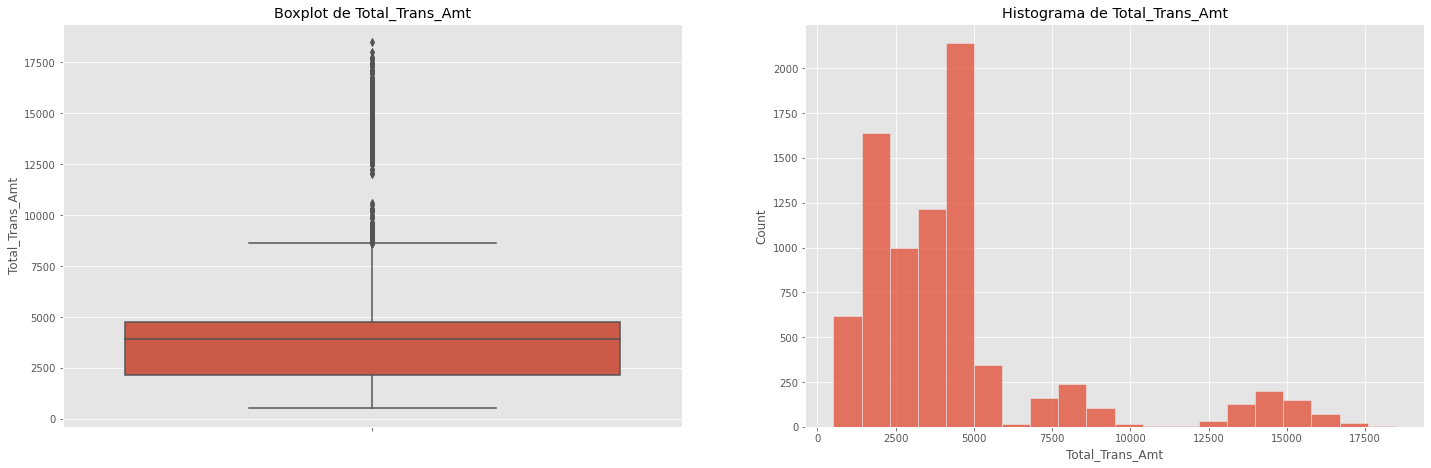

In [24]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Trans_Amt"], ax = axes[0])
sns.histplot(data = datos.Total_Trans_Amt, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Trans_Amt")
axes[1].set_title("Histograma de Total_Trans_Amt")
plt.show()

#### Total_Trans_Ct

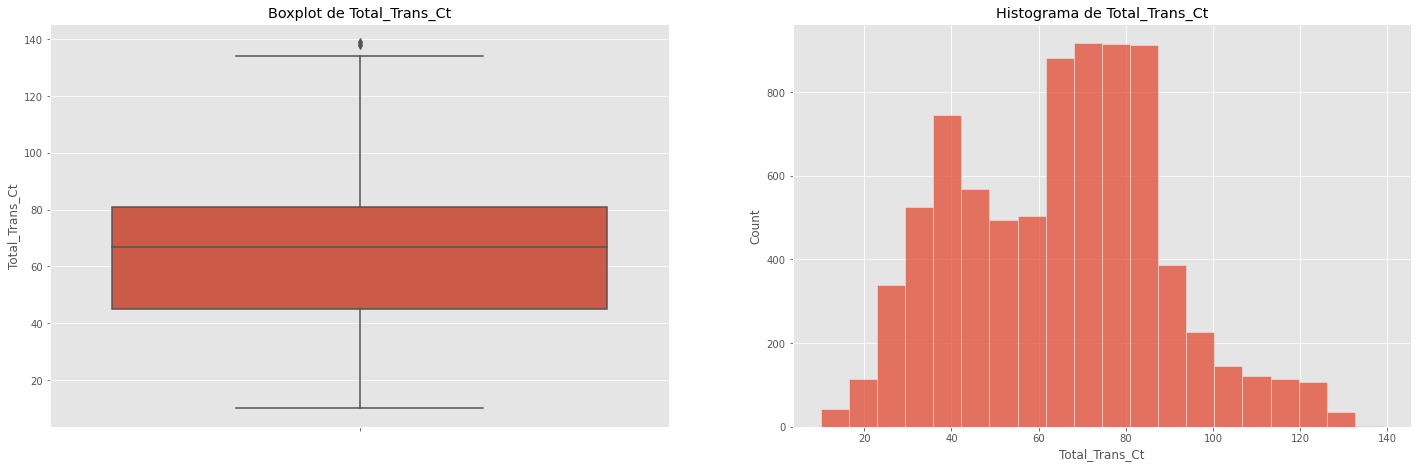

In [25]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Trans_Ct"], ax = axes[0])
sns.histplot(data = datos.Total_Trans_Ct, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Trans_Ct")
axes[1].set_title("Histograma de Total_Trans_Ct")
plt.show()

#### Total_Ct_Chng_Q4_Q1

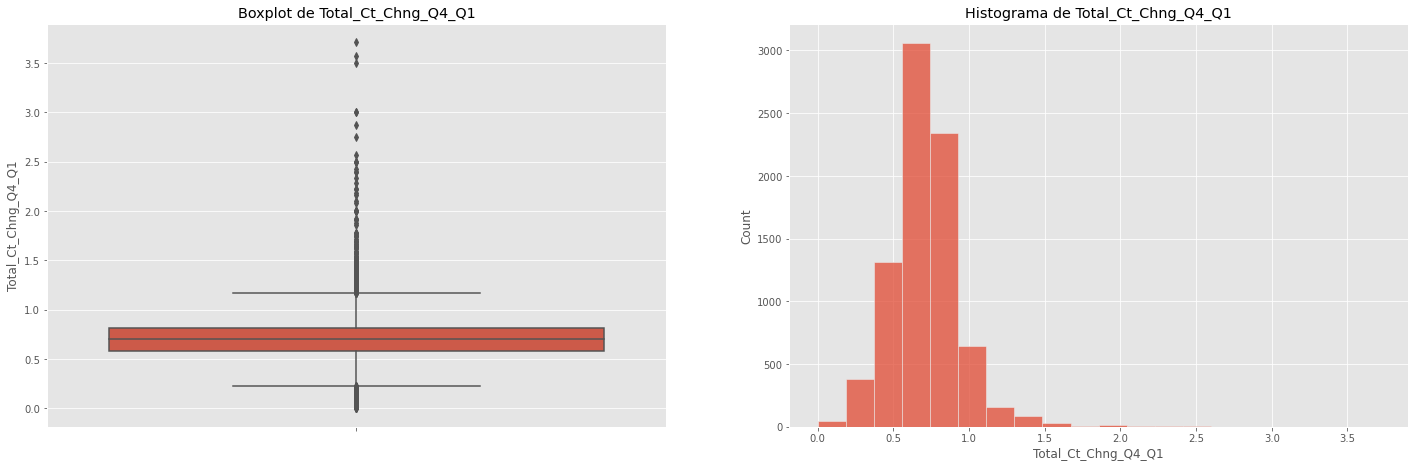

In [26]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Total_Ct_Chng_Q4_Q1"], ax = axes[0])
sns.histplot(data = datos.Total_Ct_Chng_Q4_Q1, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Total_Ct_Chng_Q4_Q1")
axes[1].set_title("Histograma de Total_Ct_Chng_Q4_Q1")
plt.show()

#### Avg_Utilization_Ratio

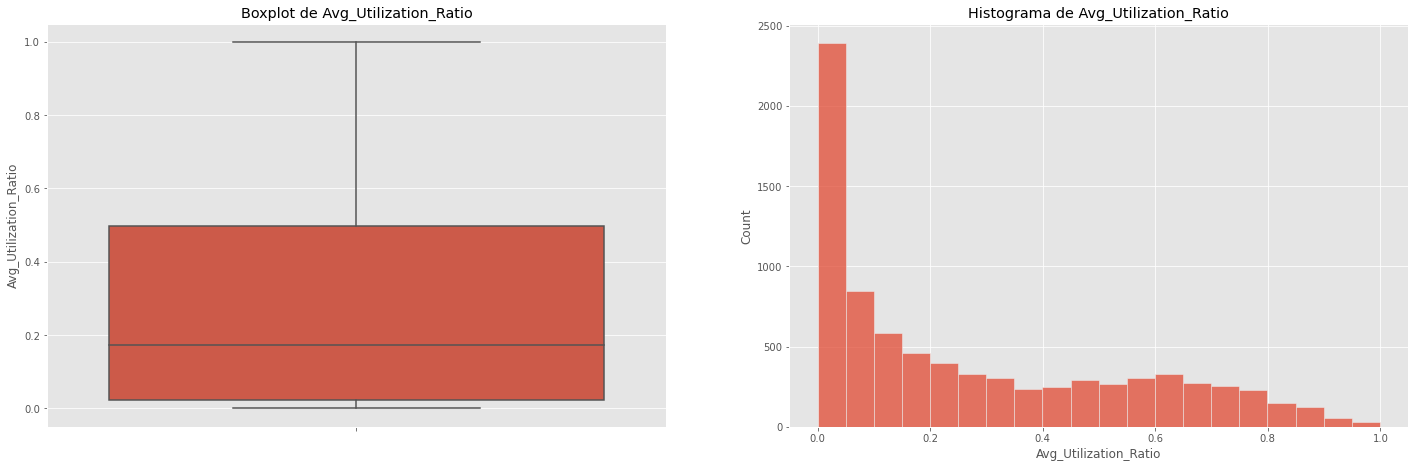

In [27]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.boxplot(y = datos["Avg_Utilization_Ratio"], ax = axes[0])
sns.histplot(data = datos.Avg_Utilization_Ratio, bins=20, ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Boxplot de Avg_Utilization_Ratio")
axes[1].set_title("Histograma de Avg_Utilization_Ratio")
plt.show()

Ahora vamos a analizar las variables categóricas. Estas son Gender, Education_Level, Marital_Status,	Income_Category y	Card_Category.

#### Gender

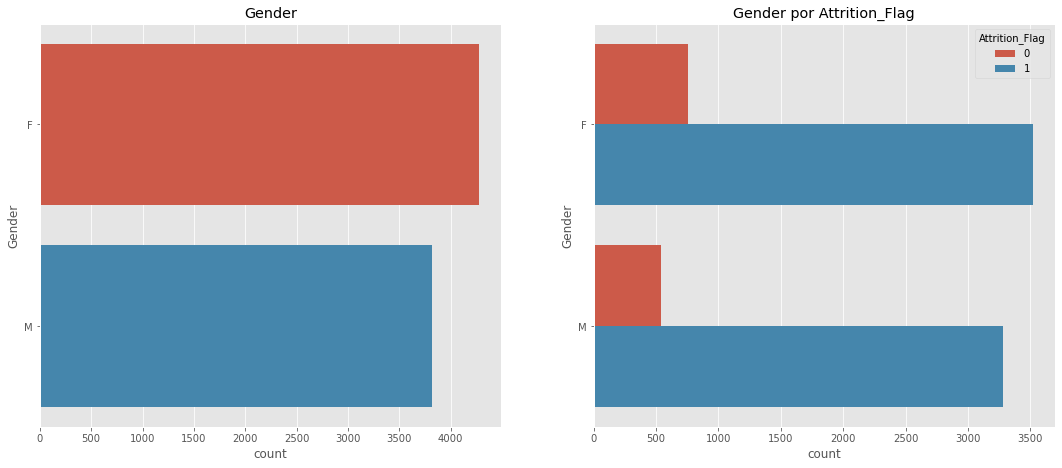

In [28]:
f, axes = plt.subplots(1, 2, figsize = (12,7))
sns.countplot(y = train["Gender"], ax = axes[0])
sns.countplot(y = train["Gender"], hue = train["Attrition_Flag"], ax = axes[1])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Gender")
axes[1].set_title("Gender por Attrition_Flag")
plt.show()

#### Education_Level

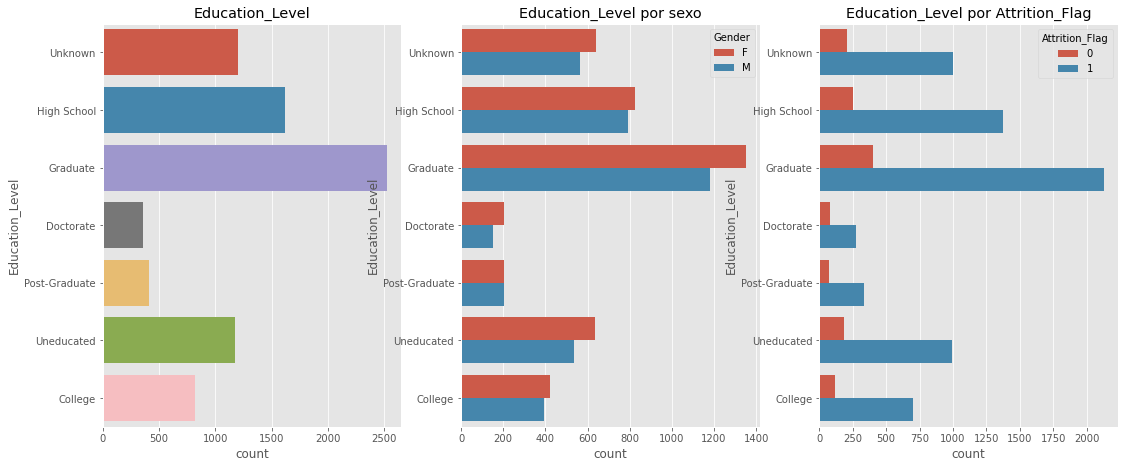

In [29]:
f, axes = plt.subplots(1, 3, figsize = (12,7))
sns.countplot(y = train["Education_Level"], ax = axes[0])
sns.countplot(y = train["Education_Level"], hue = train["Gender"], ax = axes[1])
sns.countplot(y = train["Education_Level"], hue = train["Attrition_Flag"], ax = axes[2])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Education_Level")
axes[1].set_title("Education_Level por sexo")
axes[2].set_title("Education_Level por Attrition_Flag")
plt.show()

#### Marital_Status

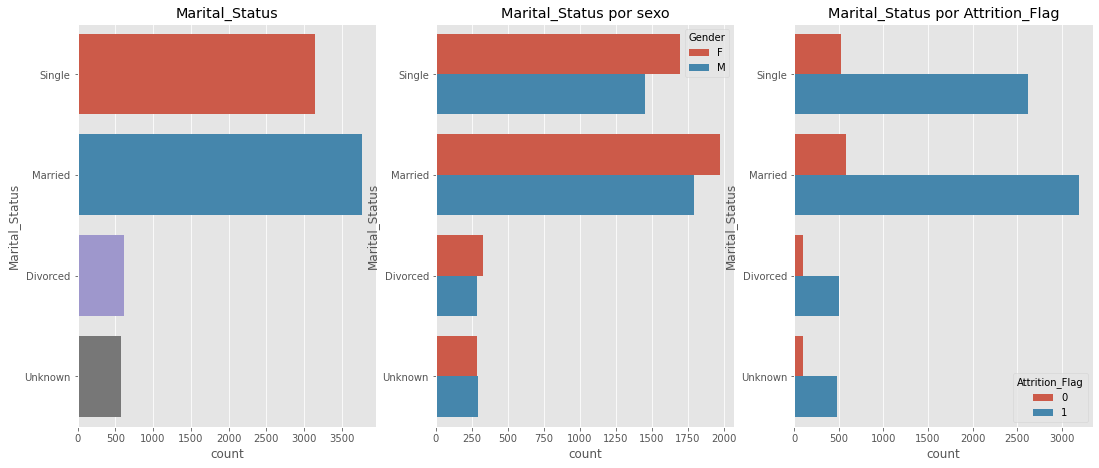

In [30]:
f, axes = plt.subplots(1, 3, figsize = (12,7))
sns.countplot(y = train["Marital_Status"], ax = axes[0])
sns.countplot(y = train["Marital_Status"], hue = train["Gender"], ax = axes[1])
sns.countplot(y = train["Marital_Status"], hue = train["Attrition_Flag"], ax = axes[2])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Marital_Status")
axes[1].set_title("Marital_Status por sexo")
axes[2].set_title("Marital_Status por Attrition_Flag")
plt.show()

####  Income_Category

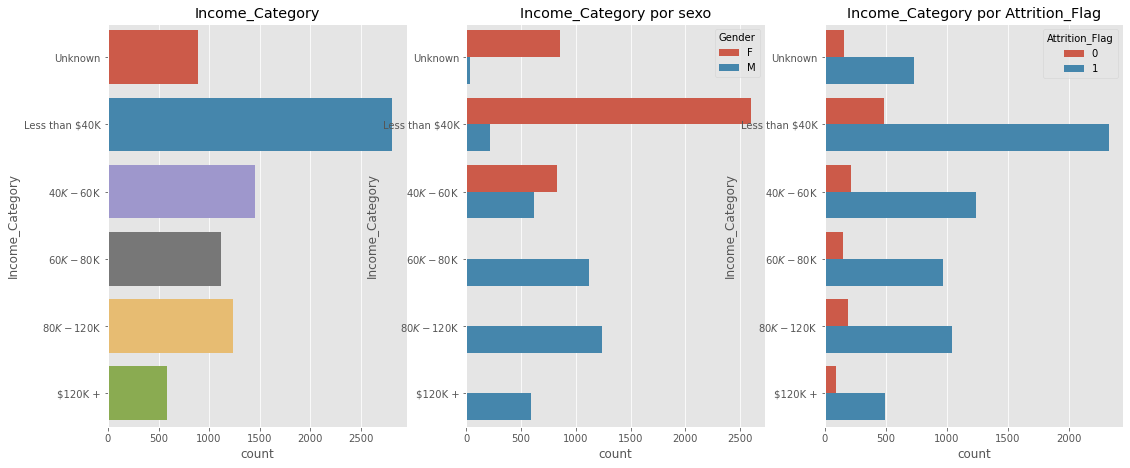

In [31]:
f, axes = plt.subplots(1, 3, figsize = (12,7))
sns.countplot(y = train["Income_Category"], ax = axes[0])
sns.countplot(y = train["Income_Category"], hue = train["Gender"], ax = axes[1])
sns.countplot(y = train["Income_Category"], hue = train["Attrition_Flag"], ax = axes[2])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Income_Category")
axes[1].set_title("Income_Category por sexo")
axes[2].set_title("Income_Category por Attrition_Flag")
plt.show()

#### Card_Category

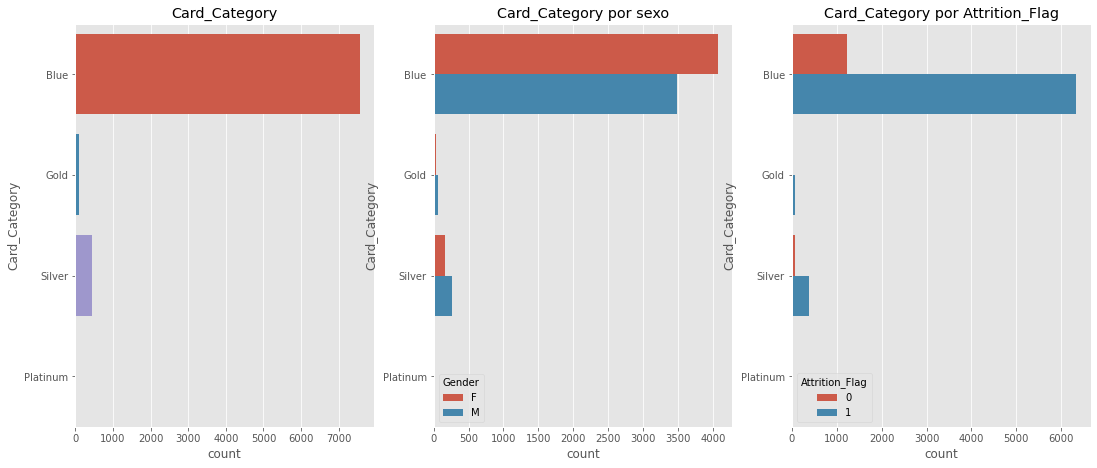

In [32]:
f, axes = plt.subplots(1, 3, figsize = (12,7))
sns.countplot(y = train["Card_Category"], ax = axes[0])
sns.countplot(y = train["Card_Category"], hue = train["Gender"], ax = axes[1])
sns.countplot(y = train["Card_Category"], hue = train["Attrition_Flag"], ax = axes[2])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes[0].set_title("Card_Category")
axes[1].set_title("Card_Category por sexo")
axes[2].set_title("Card_Category por Attrition_Flag")
plt.show()

### Outliers

In [33]:
# Para calcular el IQR y los "putnos de corte" utilizamos el método describe y accedemos a los campos apropiados
#Definimos la funcion para detectar outliers
def deteccionOutilers_IQR(data, k = 1.5):
    resumen = data.describe()
    IQR = resumen.loc['75%'] - resumen.loc['25%']
    l1 = data > (k * IQR + resumen.loc['75%'])
    l2 = data < (-k * IQR + resumen.loc['25%'])
    return np.logical_or(l1,l2)

In [34]:
variables_numericas = set(train_num.columns) - set(["Attrition_Flag"])

In [35]:
for var in variables_numericas:
    print("Numero de outliers de la variable ", var, ": ", deteccionOutilers_IQR(datos[var], k = 4).sum())

Numero de outliers de la variable  Avg_Open_To_Buy :  0
Numero de outliers de la variable  Customer_Age :  0
Numero de outliers de la variable  Total_Trans_Ct :  0
Numero de outliers de la variable  Avg_Utilization_Ratio :  0
Numero de outliers de la variable  Total_Ct_Chng_Q4_Q1 :  37
Numero de outliers de la variable  Months_on_book :  0
Numero de outliers de la variable  Credit_Limit :  0
Numero de outliers de la variable  Months_Inactive_12_mon :  0
Numero de outliers de la variable  Total_Relationship_Count :  0
Numero de outliers de la variable  Contacts_Count_12_mon :  0
Numero de outliers de la variable  Total_Trans_Amt :  203
Numero de outliers de la variable  Dependent_count :  0
Numero de outliers de la variable  Total_Amt_Chng_Q4_Q1 :  27
Numero de outliers de la variable  Total_Revolving_Bal :  0


No tenemos demasiados outliers extremos. **Explicacion**

### Valores nulos

In [36]:
print('Numero de nulos totales del dataset: {}'.format(datos.isnull().sum().sum()))
datos.isnull().sum()

Numero de nulos totales del dataset: 0


GenderF                            0
Education_Level: College           0
Education_Level: Doctorate         0
Education_Level: Graduate          0
Education_Level: High School       0
Education_Level: Post-Graduate     0
Education_Level: Uneducated        0
Education_Level: Unknown           0
Marital_Status: Divorced           0
Marital_Status: Married            0
Marital_Status: Single             0
Marital_Status: Unknown            0
Income_Category: $120K +           0
Income_Category: $40K - $60K       0
Income_Category: $60K - $80K       0
Income_Category: $80K - $120K      0
Income_Category: Less than $40K    0
Income_Category: Unknown           0
Card_Category: Blue                0
Card_Category: Gold                0
Card_Category: Platinum            0
Card_Category: Silver              0
Customer_Age                       0
Dependent_count                    0
Months_on_book                     0
Total_Relationship_Count           0
Months_Inactive_12_mon             0
C

## Balanceo del muestreo

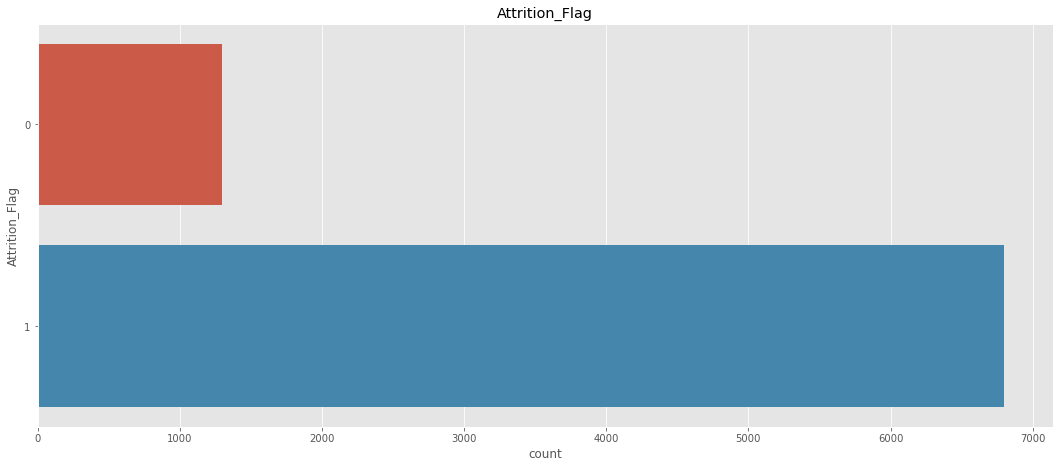

In [37]:
f, axes = plt.subplots(figsize = (12,7))
sns.countplot(y = train["Attrition_Flag"])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
axes.set_title("Attrition_Flag")
plt.show()

Se puede observar una muestra bastante desbalanceada.

Para esta parte tenemos que establecer un clasificador base para poder comparar los distintos métodos de balanceo de muestra. Para ello haremos uso del LazyClasifier y escogeremos como clasificador base el que mejor F1score de.

In [38]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,-1]

In [39]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 57, stratify = y)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_val, y_train, y_val)
models

100%|██████████| 29/29 [00:23<00:00,  1.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.96,0.96,0.98,0.18
XGBClassifier,0.98,0.95,0.95,0.98,0.40
BaggingClassifier,0.96,0.93,0.93,0.96,2.34
AdaBoostClassifier,0.97,0.93,0.93,0.97,8.11
RandomForestClassifier,0.96,0.89,0.89,0.96,4.17
DecisionTreeClassifier,0.94,0.89,0.89,0.94,0.53
ExtraTreesClassifier,0.94,0.82,0.82,0.93,0.45
NearestCentroid,0.82,0.81,0.81,0.84,0.02
PassiveAggressiveClassifier,0.88,0.81,0.81,0.89,0.02


In [41]:
model = ltb.LGBMClassifier(learning_rate=0.05,max_depth=-5,random_state=42,n_estimators = 250)##0.943 usando todos los datos
model.fit(X_train, y_train, eval_set=[(X_val,y_val),(X_train,y_train)], eval_metric = "f1")
print(model)
    
expected_y  = y_val
predicted_y = model.predict(X_val)

[1]	training's binary_logloss: 0.406575	valid_0's binary_logloss: 0.40815
[2]	training's binary_logloss: 0.379561	valid_0's binary_logloss: 0.381718
[3]	training's binary_logloss: 0.356616	valid_0's binary_logloss: 0.358769
[4]	training's binary_logloss: 0.336552	valid_0's binary_logloss: 0.339515
[5]	training's binary_logloss: 0.318004	valid_0's binary_logloss: 0.321592
[6]	training's binary_logloss: 0.301844	valid_0's binary_logloss: 0.306577
[7]	training's binary_logloss: 0.287771	valid_0's binary_logloss: 0.293379
[8]	training's binary_logloss: 0.275115	valid_0's binary_logloss: 0.281461
[9]	training's binary_logloss: 0.263303	valid_0's binary_logloss: 0.270627
[10]	training's binary_logloss: 0.252606	valid_0's binary_logloss: 0.260475
[11]	training's binary_logloss: 0.242611	valid_0's binary_logloss: 0.250627
[12]	training's binary_logloss: 0.233353	valid_0's binary_logloss: 0.2422
[13]	training's binary_logloss: 0.224637	valid_0's binary_logloss: 0.234603
[14]	training's binary_l

[204]	training's binary_logloss: 0.0100602	valid_0's binary_logloss: 0.054205
[205]	training's binary_logloss: 0.00995492	valid_0's binary_logloss: 0.0541201
[206]	training's binary_logloss: 0.0098406	valid_0's binary_logloss: 0.0540713
[207]	training's binary_logloss: 0.00972511	valid_0's binary_logloss: 0.0539783
[208]	training's binary_logloss: 0.00962575	valid_0's binary_logloss: 0.0539839
[209]	training's binary_logloss: 0.00951621	valid_0's binary_logloss: 0.0540275
[210]	training's binary_logloss: 0.00942032	valid_0's binary_logloss: 0.0541919
[211]	training's binary_logloss: 0.00929863	valid_0's binary_logloss: 0.0540311
[212]	training's binary_logloss: 0.00920101	valid_0's binary_logloss: 0.0541399
[213]	training's binary_logloss: 0.00910423	valid_0's binary_logloss: 0.0539859
[214]	training's binary_logloss: 0.00898405	valid_0's binary_logloss: 0.0539606
[215]	training's binary_logloss: 0.00888236	valid_0's binary_logloss: 0.0538767
[216]	training's binary_logloss: 0.0087801	

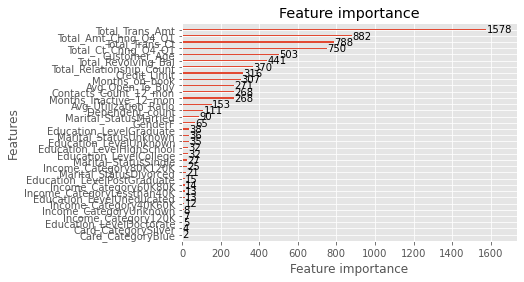

In [42]:
ltb.plot_importance(model)
plt.show()

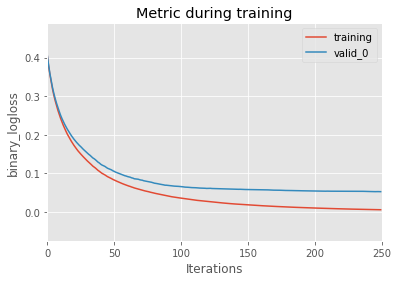

In [43]:
ltb.plot_metric(model)
plt.show()

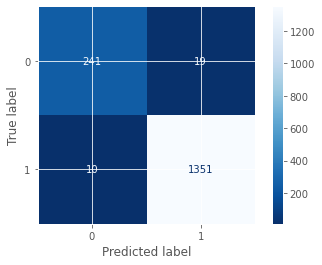

In [44]:
plot_confusion_matrix(model,X_val,y_val,cmap='Blues_r')
plt.show()

In [45]:
print(f1_score(expected_y, predicted_y))

0.9893811790552911


Hay bastantes mas de la clase 0 de los de val. Está mas balanceado.

## Balanceo de muestra

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 99)

#tecnicas de muestreo
tl = us.TomekLinks()
smote = os.SMOTE(random_state = 42)
oss = us.OneSidedSelection(random_state = 42)
smoteTomek = hib.SMOTETomek(random_state = 42)
smoteEnn = hib.SMOTEENN(random_state = 42)

model = ltb.LGBMClassifier(learning_rate=0.1,n_estimators=80, random_state=0)

listaMetodos = ['Técnica OSS', 'Técnica híbrida SMOTE con Tomek Links', 'Técnica híbrida SMOTE con ENN', 'Técnica Tomek Links', 'Técnica SMOTE']
listaTecnicas = [oss, smoteTomek, smoteEnn, tl, smote]

print('USO DE DATOS SIN ESTANDARIZAR\n')
# Se crea una lista para almacenar el resultado de test de cada técnica de
#muestreo, almacenamos el F Score de las predicciones obtenidas con nuestro clasificador
listaF_Score=[]

# Por cada técnica se cogen los datos de entrada y de salida (muestreados para realizar el aprendizaje)
for nombre, metodo in zip(listaMetodos, listaTecnicas):
    # Generamos la pipeline con los componentes adecuados
    pipe = Pipeline([(nombre,metodo),('Modelo base', model)])
    # Entrenamiento de la pipeline
    pipe = pipe.fit(X_train,y_train)
    # Precicción de los datos de test 
    prediccionesTest = pipe.predict(X_val)     
    # Se añade a la lista el resultado de test a la lista listaF_Score
    f_score=f1_score(y_val, prediccionesTest)
    listaF_Score.append(f_score)
    
    print('F Score obtenido en test utilizando la {}: Rendimiento: {}'.format(nombre,f_score)) 
    
#Se podria dar el caso de que en dos o mas técnicas se obtenga el mismo F Score, en ese caso se activa
#el siguiente codigo y se desactiva la ultima linea. Despues habría que analizar con cual de las ténicas nos quedamos    
#for i in np.where(listaF_Score==max(listaF_Score))[0]:
#    print('\n\nLa mejor tecnica es : {}.'.format(listaMetodos[i]))
print('\n\nLa mejor tecnica es : {}.'.format(listaMetodos[int(np.where(listaF_Score==max(listaF_Score))[0])]))

USO DE DATOS SIN ESTANDARIZAR

F Score obtenido en test utilizando la Técnica OSS: Rendimiento: 0.9831199068684517
F Score obtenido en test utilizando la Técnica híbrida SMOTE con Tomek Links: Rendimiento: 0.9831100757134538
F Score obtenido en test utilizando la Técnica híbrida SMOTE con ENN: Rendimiento: 0.9688519727083952
F Score obtenido en test utilizando la Técnica Tomek Links: Rendimiento: 0.9825986078886311
F Score obtenido en test utilizando la Técnica SMOTE: Rendimiento: 0.984570596797671


La mejor tecnica es : Técnica SMOTE.


In [47]:
Xtrain_res, y_train_res = oss.fit_resample(X, y)
print(y_train.value_counts())
print(y_train_res.value_counts())

model = ltb.LGBMClassifier(learning_rate=0.1,max_depth=-5,random_state=42,n_estimators = 100)##0.943 usando todos los datos
model.fit(Xtrain_res, y_train_res, eval_metric = "f1")
expected_y  = y_val
predicted_y = model.predict(X_val)

print(f1_score(expected_y, predicted_y))

1    5085
0     990
Name: Attrition_Flag, dtype: int64
1    6512
0    1300
Name: Attrition_Flag, dtype: int64
0.9985409979573971


No se mejoran los resultados

## Selección de variables

In [48]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [49]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_[:4],
    columns = X.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,GenderF,Education_LevelCollege,Education_LevelDoctorate,Education_LevelGraduate,Education_LevelHighSchool,Education_LevelPostGraduate,Education_LevelUneducated,Education_LevelUnknown,Marital_StatusDivorced,Marital_StatusMarried,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
PC1,0.29,0.01,-0.01,0.00,-0.00,0.01,-0.00,-0.01,0.01,-0.05,...,-0.02,0.01,0.46,-0.04,0.46,0.01,0.14,0.08,-0.01,-0.30
PC2,-0.29,-0.01,-0.01,0.01,-0.02,0.00,0.01,0.01,0.03,-0.20,...,-0.04,-0.15,-0.03,0.10,-0.04,0.03,0.46,0.48,0.10,0.12
PC3,-0.21,-0.01,0.06,0.02,-0.05,-0.04,0.01,0.01,-0.07,-0.06,...,0.12,0.03,0.03,-0.08,0.04,-0.18,-0.02,-0.02,-0.13,-0.06
PC4,0.07,-0.03,-0.03,0.03,0.02,0.01,-0.01,-0.02,-0.05,0.53,...,-0.05,-0.13,0.03,0.36,-0.00,0.19,0.18,0.13,0.21,0.26


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.09214341e-01 6.41434817e-02 5.17349711e-02 4.97630138e-02
 4.65318628e-02 4.17386024e-02 3.80380888e-02 3.71114371e-02
 3.63344060e-02 3.48782754e-02 3.41323987e-02 3.30310104e-02
 3.27519622e-02 3.19132402e-02 3.13922378e-02 3.09620505e-02
 2.96258909e-02 2.95575567e-02 2.88200187e-02 2.80499869e-02
 2.74730277e-02 2.71832715e-02 2.69247901e-02 2.47765995e-02
 2.21720859e-02 1.68279905e-02 1.39998727e-02 6.03484186e-03
 5.74370054e-03 4.72155574e-03 4.41743136e-03 2.77947597e-32
 4.98787317e-33 1.07081850e-33 1.00486543e-33 8.26609314e-34]


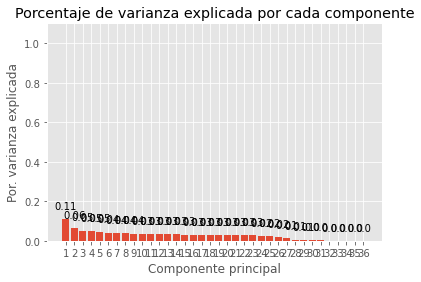

In [50]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.10921434 0.17335782 0.22509279 0.27485581 0.32138767 0.36312627
 0.40116436 0.4382758  0.4746102  0.50948848 0.54362088 0.57665189
 0.60940385 0.64131709 0.67270933 0.70367138 0.73329727 0.76285483
 0.79167485 0.81972483 0.84719786 0.87438113 0.90130592 0.92608252
 0.94825461 0.9650826  0.97908247 0.98511731 0.99086101 0.99558257
 1.         1.         1.         1.         1.         1.        ]


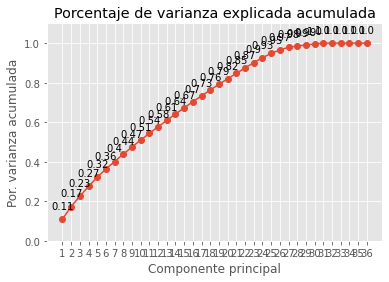

In [51]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

<Figure size 432x288 with 0 Axes>

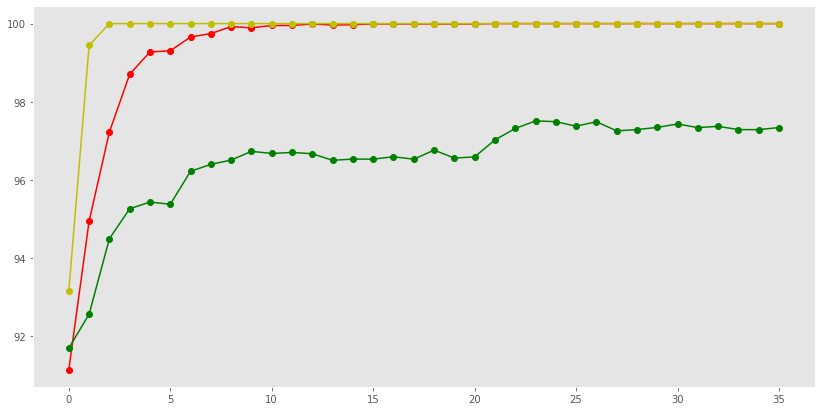

In [52]:
listaAccTrain = [] # lista para almancenar el rendimiento de las diferentes posibilidades en train
listaAccTest = [] # lista para almancenar el rendimiento de las diferentes posibilidades en test
listaPorInf = [] # lista para almancenar el porcentje de información representado por las diferentes posibilidades

for i in range(0,X_train.shape[1]):
    pca = PCA(n_components = i+1, svd_solver = 'full')
    pca.fit(X_train,y_train)
    listaPorInf.append(np.sum(pca.explained_variance_ratio_*100))

    X_train_seleccion = pca.transform(X_train)
    X_test_seleccion = pca.transform(X_val)


    model = ltb.LGBMClassifier(learning_rate=0.1,max_depth=-5,random_state=42,n_estimators = 100)##0.943 usando todos los datos
    model.fit(X_train_seleccion, y_train, eval_metric = "f1")
    

    prediccionTrain = model.predict(X_train_seleccion)
    prediccionTest = model.predict(X_test_seleccion)

    listaAccTrain.append(f1_score(prediccionTrain,y_train)*100)
    listaAccTest.append(f1_score(prediccionTest,y_val)*100)

fig = plt.figure()
plt.figure(figsize = (14, 7))
plt.plot(np.arange(0, X_val.shape[1]), listaAccTrain, marker="o", c="r", label="% acierto train")
plt.plot(np.arange(0, X_val.shape[1]), listaAccTest, marker="o", c="g", label="% acierto test")
plt.plot(np.arange(0, X_val.shape[1]), listaPorInf, marker="o", c="y", label="% de información representada")
plt.grid()
plt.show()

In [53]:
np.where(listaPorInf==max(listaPorInf))[0][0]## Con 30 componentes es el máximo de info

30

In [54]:
model = ltb.LGBMClassifier(learning_rate=0.1,max_depth=-5,random_state=42,n_estimators = 100)
pca = PCA(n_components = 30, svd_solver = 'full')
y = datos.iloc[:,-1]
pipe = Pipeline([("PCA",pca),('Modelo LGBM', model)])
pipe.fit(X, y)

Pipeline(steps=[('PCA', PCA(n_components=30, svd_solver='full')),
                ('Modelo LGBM', LGBMClassifier(max_depth=-5, random_state=42))])

Tampoco se mejora el resultado.

## Mejor solución

In [55]:
model = ltb.LGBMClassifier(random_state=123)##0.943 usando todos los datos semilla 42
model.fit(X, y)

LGBMClassifier(random_state=123)

In [56]:
predicciones = model.predict(datos_test) # Aqui sería una lista con las predicciones
diccionario = {}
for i in datos_test.index:
    diccionario[i] = int(predicciones[i])
# Data to be written
json_entrega = {
    "target": diccionario
}
  
# Serializing json
json_object = json.dumps(json_entrega, indent=4)
  
# Writing to sample.json
with open("predictions.json", "w") as outfile:
    outfile.write(json_object)